### Introduction 

online_shoppers_intention.csv on UCI Machine Learning Repository consists of 12,330
sessions with 84.5% negative class samples, i.e.; it was not ended with shopping, Only 15.5%
did shopping. 

Data set has 18 attributes.

Repository dataset as it is filtered to make sure each session would belong to a different user in a 1-year period to
avoid any tendency to a specific campaign, special day, user profile or period.

In [221]:
import pandas as pd
import numpy as np

import scipy 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [222]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

### DATA WRANGLING

In [223]:
df = df[~df.ProductRelated_Duration.isnull()]   
len(df)*100/12330

99.88645579886456

In [224]:
df_w = df
for col in df_w.columns[0:6]:
    df_w = df_w[ df_w[col] != 0 ]
    
#len(df_w)*100/12330
df_w.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
57,4.0,56.000000,2.0,120.0,36.0,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
103,2.0,31.000000,1.0,16.0,36.0,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False
109,6.0,326.250000,4.0,94.0,128.0,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False
161,2.0,58.000000,2.0,22.0,31.0,829.166667,0.030303,0.040606,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,True,False
187,10.0,293.778205,2.0,153.0,96.0,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False


### Features

Data set consists of 10 numerical and 8 categorical attributes. 

In [225]:
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month
0,0.0,0.0,0.0,0.0,1.0,0.20,0.20,0.0,0.0,Feb
1,0.0,0.0,0.0,0.0,2.0,0.00,0.10,0.0,0.0,Feb
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.20,0.0,0.0,Feb
3,0.0,0.0,0.0,0.0,2.0,0.05,0.14,0.0,0.0,Feb
4,0.0,0.0,0.0,0.0,10.0,0.02,0.05,0.0,0.0,Feb


In [226]:
df [ ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue'] ].head()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,Returning_Visitor,False,False
1,2,2,1,2,Returning_Visitor,False,False
2,4,1,9,3,Returning_Visitor,False,False
3,3,2,2,4,Returning_Visitor,False,False
4,3,3,1,4,Returning_Visitor,True,False


In [227]:
df1 = df[ df['Revenue']==True ]
df2 = df[ df['Revenue']==False ]

In [228]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [229]:
df2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000,10408.000000
mean,2.120580,73.834208,0.452248,30.270759,28.748943,1071.347468,0.025275,0.047301,1.978656,0.068524,2.129900,2.340027,3.160069,4.079458
std,3.203691,171.113655,1.212197,133.995808,40.761323,1804.628147,0.051817,0.051163,9.078234,0.209179,0.908115,1.682655,2.401221,4.031552
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.500000,0.000000,0.015554,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,512.180556,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.225000,0.000000,0.000000,35.000000,1333.075000,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


In [230]:
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [231]:
df['Revenue'].value_counts()[0]/df['Revenue'].value_counts().sum(), df['Revenue'].value_counts()[1]/df['Revenue'].value_counts().sum()

(0.8450795712893797, 0.15492042871062034)

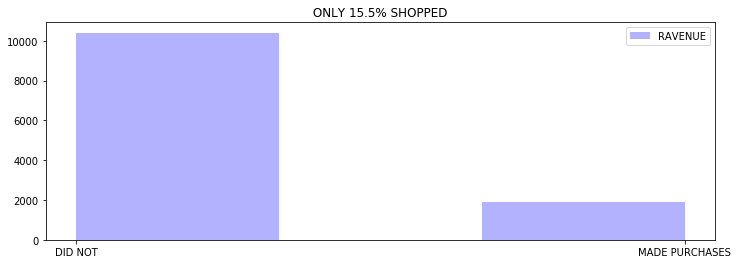

In [232]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else 0 ).hist(bins=3, alpha=0.3, color='blue', label='RAVENUE')
plt.grid()
plt.xticks([0,1],('DID NOT', 'MADE PURCHASES'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ONLY 15.5% SHOPPED ')
plt.show()

#### REVENUE VS Weekend 

In [233]:
df1['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

In [234]:
df1['Weekend'].value_counts()[0]/df1['Weekend'].value_counts().sum(), df1['Weekend'].value_counts()[1]/df1['Weekend'].value_counts().sum()

(0.7384696016771488, 0.26153039832285113)

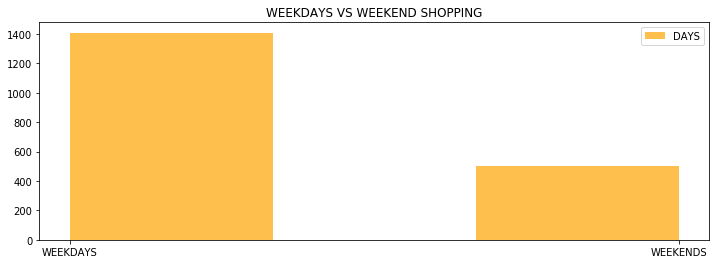

In [235]:
plt.figure(figsize=(12,4))
df1['Weekend'].apply(lambda x: 1 if (x==True) else 0).hist(bins=3, alpha=0.7, color='orange', label='DAYS')
plt.grid()
plt.xticks([0,1],('WEEKDAYS', 'WEEKENDS'))
plt.autoscale(enable=True)
plt.legend()
plt.title('WEEKDAYS VS WEEKEND SHOPPING')
plt.show()

#### REVENUE VS MONTH

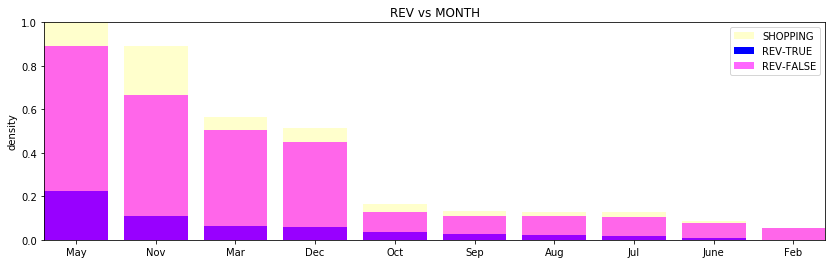

In [236]:
y0 = df['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y1 = df1['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y2 = df2['Month'].value_counts().values/np.max(df['Month'].value_counts().values)

plt.figure(figsize=(14,4))

plt.bar(df['Month'].value_counts().index,y0,alpha=0.2, color='yellow', label='SHOPPING' )
plt.bar(df['Month'].value_counts().index,y1,alpha=1.0, color='blue', label='REV-TRUE' )
plt.bar(df['Month'].value_counts().index,y2,alpha=0.6, color='magenta', label='REV-FALSE' )

plt.legend()
plt.title('REV vs MONTH')
plt.ylabel('density')
plt.autoscale(tight=True, enable=True)
plt.show()

In [237]:
df_w1 = df_w[ df_w['Revenue']==1 ]

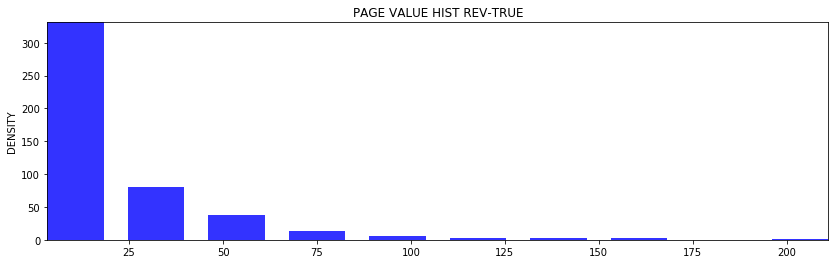

In [238]:
plt.figure(figsize=(14,4))
df_w1['PageValues'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='PAGE VALUE')
plt.grid()
plt.autoscale(tight=True, enable=True)
plt.title('PAGE VALUE HIST REV-TRUE')
plt.ylabel('DENSITY')
plt.show()

### PIE CHARTS VIS

In [239]:
df['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [240]:
pie_val = [ df1['VisitorType'].value_counts()[0]/df1['VisitorType'].value_counts().sum(), df1['VisitorType'].value_counts()[1]/df1['VisitorType'].value_counts().sum(), df1['VisitorType'].value_counts()[1]/df1['VisitorType'].value_counts().sum() ]
pie_val

[0.7704402515723271, 0.22117400419287211, 0.22117400419287211]

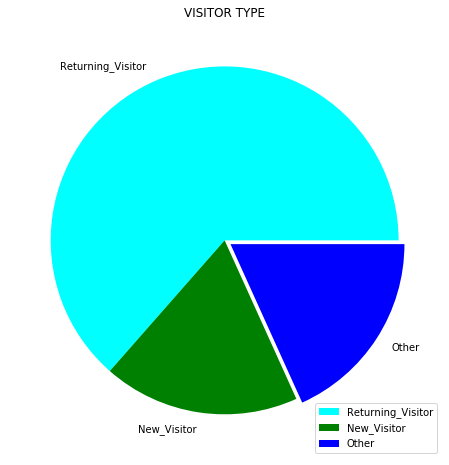

In [241]:
plt.figure(figsize=(8,8))
plt.pie(pie_val, colors = ['cyan', 'green', 'blue'], explode=[0, 0, 0.04], labels = ['Returning_Visitor', 'New_Visitor', 'Other']  )
plt.legend()
plt.title('VISITOR TYPE')
plt.show()

In [242]:
df1['OperatingSystems'].value_counts()

2    1155
1     379
3     268
4      85
8      17
6       2
7       1
5       1
Name: OperatingSystems, dtype: int64

In [243]:
opsys = []
for val in df1['OperatingSystems'].value_counts():
    opsys.append(val)
 

opsys

[1155, 379, 268, 85, 17, 2, 1, 1]

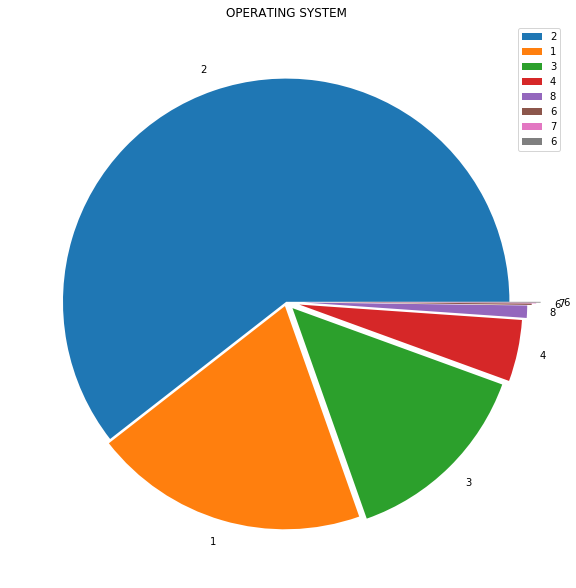

In [244]:
plt.figure(figsize=(10,12))
lab_list = ['2', '1', '3', '4', '8', '6', '7', '6'] 
exp_list = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(opsys, labels = lab_list, explode = exp_list )
plt.legend()
plt.title('OPERATING SYSTEM')
plt.show()

In [245]:
df1['SpecialDay'].value_counts()

0.0    1831
0.6      29
0.2      14
0.4      13
0.8      11
1.0      10
Name: SpecialDay, dtype: int64

In [246]:
SP_DAY = []
category = []
idx = 0
norm = df1['SpecialDay'].value_counts().sum()
for val in df1['SpecialDay'].value_counts():
    SP_DAY.append(val/norm)
    category.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 


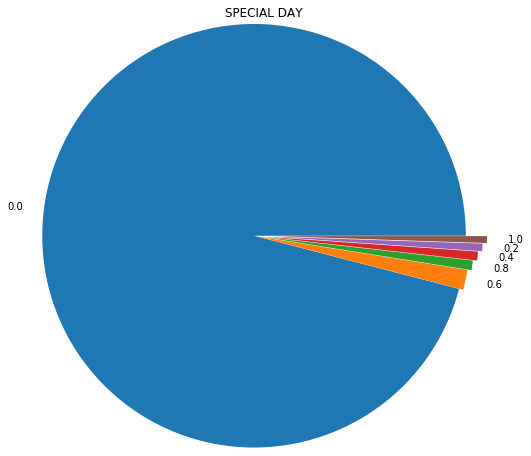

In [247]:
plt.figure(figsize=(8,10))
plt.pie(SP_DAY, labels=category, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10] )
plt.autoscale(enable=True, tight=True)
plt.title('SPECIAL DAY')
plt.grid()
plt.show()

In [248]:
df1['Region'].value_counts()

1    771
3    349
2    188
4    175
7    119
6    112
9     86
8     56
5     52
Name: Region, dtype: int64

In [249]:
re_gion = []
categoryr = []
idx = 0
norm = df1['SpecialDay'].value_counts().sum()
for val in df1['SpecialDay'].value_counts():
    re_gion.append(val/norm)
    categoryr.append(df1['SpecialDay'].value_counts().index[idx])
    idx += 1 

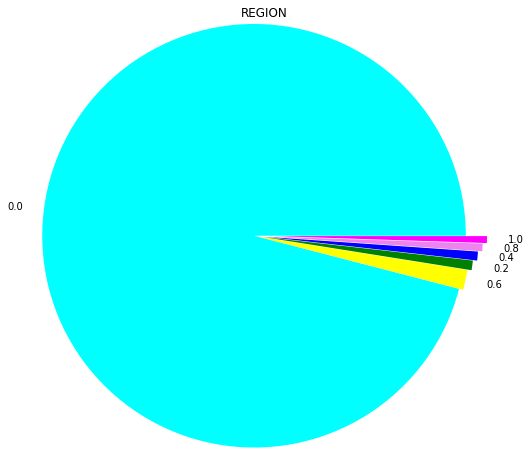

In [250]:
plt.figure(figsize=(8,10))
plt.pie(re_gion, labels=categoryr, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10], colors=['cyan','yellow','green','blue','violet','magenta'] )
plt.autoscale(enable=True, tight=True)
plt.title('REGION')
plt.grid()
plt.show()

### FEATURE ANALYSIS

#### VISITOR-TYPE

In [251]:
df1['VisitorType'].value_counts()

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: VisitorType, dtype: int64

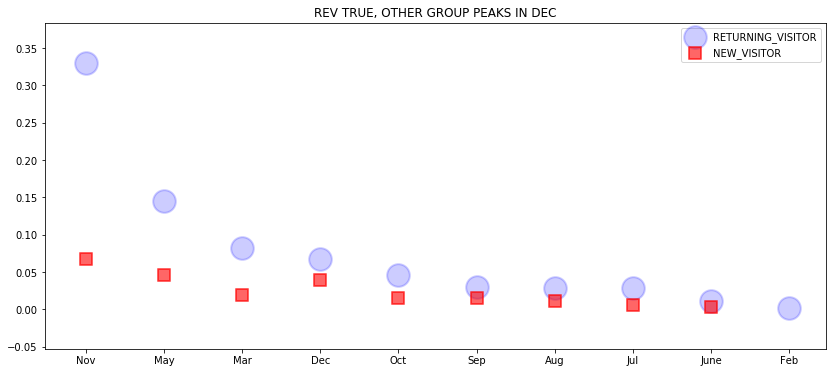

In [252]:
df1_11 = df1[ df1['VisitorType']=='Returning_Visitor' ]
x1 = np.array(df1_11['Month'].value_counts().index)
y1 = np.array(df1_11['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))

df1_2 = df1[ df1['VisitorType']=='New_Visitor' ]
x2 = np.array(df1_2['Month'].value_counts().index)
y2 = np.array(df1_2['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))

plt.figure(figsize=(14,6))
plt.scatter(x1,y1,label='RETURNING_VISITOR',s=2**9, c='blue', marker='o',linewidths=2, alpha=0.2, facecolor=None)
plt.scatter(x2,y2,label='NEW_VISITOR', s=2**7, c='red', marker='s',linewidths=2,alpha=0.6,facecolor=None )

plt.legend()
plt.title('REV TRUE, OTHER GROUP PEAKS IN DEC')
plt.show()


### WEEKDAYS vs WEEKEND

In [253]:
df1['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

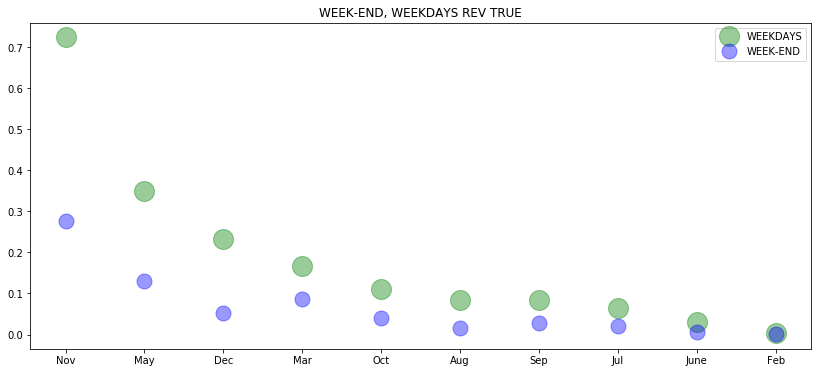

In [254]:
df1_1 = df1[ df1['Weekend']==False ]
xx1 = np.array(df1_1['Month'].value_counts().index)
yy1 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1['Month'].value_counts().values))


df1_1 = df1[ df1['Weekend']==True ]
xx2 = np.array(df1_1['Month'].value_counts().index)
yy2 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1['Month'].value_counts().values))

plt.figure(figsize=(14,6))
plt.plot(xx1,yy1,label='WEEKDAYS',color='green',marker='o',markersize=20, alpha=0.4, linestyle='none')
plt.plot(xx2,yy2,label='WEEK-END',color='blue',marker='o',markersize=15,linestyle='none',alpha=0.4  )

plt.title('WEEK-END, WEEKDAYS REV TRUE')
plt.legend()
plt.show()

##### We found here the week-end REV has a surge in the month of MARCH

### STATISTICAL ANALYSIS

In [255]:
len(df.columns), df.columns[0:6], df.columns[8], df.columns[17]

(18, Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
       dtype='object'), 'PageValues', 'Revenue')

In [256]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [257]:
cols = [ 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

### INFERENTIAL COMPARISON BETWEEN TWO GROUPS

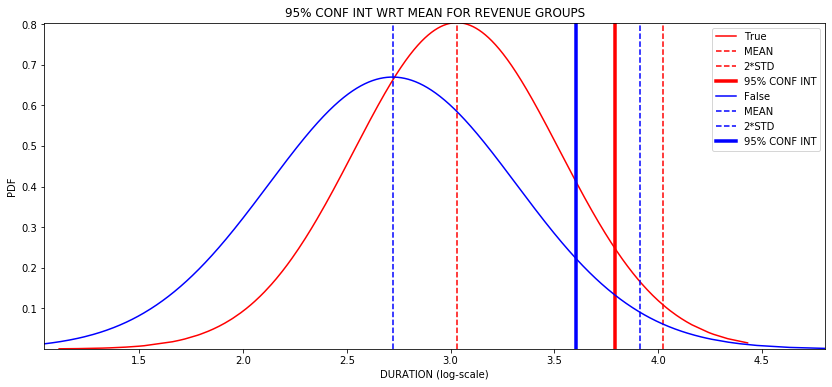

In [258]:
idx = 0
plt.figure(figsize=(14,6))
bolls = [True, False]
colr_data = ['red', 'blue']
for col in bolls:
    df1_1 = df[df['Revenue'] == col]
    df1_1 = df1_1[ df1_1['ProductRelated_Duration'] >10 ]
    datalog = np.sort(df1_1['ProductRelated_Duration'].apply(np.log10))
    datalog_pdf=scipy.stats.norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = scipy.stats.norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, color=colr_data[idx], label=col)
    plt.axvline(np.mean(datalog), linestyle='--', color=colr_data[idx], label='MEAN')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color=colr_data[idx], label='2*STD')
    plt.axvline(np.percentile(datalog, [95]), linestyle='-', color=colr_data[idx], label='95% CONF INT', linewidth=3.5)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('DURATION (log-scale)')
    plt.title('95% CONF INT WRT MEAN FOR REVENUE GROUPS')
    plt.autoscale(tight=True, enable=True)
    idx += 1

#### Clients ProductRelated_Duration (log scale) vs the probability distribution function (PDF) shows that clients ProductRelated_Duration with respect to the mean is close to 2 time the STD, can be predicted with 95% confidence.


#### HYPOTHESIS

In [259]:
df_RT = df[df['Revenue'] == True]
df_RF = df[df['Revenue'] == False]

df1 = df_RT[ df_RT['ProductRelated_Duration'] >10 ]
df2 = df_RF[ df_RF['ProductRelated_Duration'] >10 ]

ttest_ind(df1['ProductRelated_Duration'], df2['ProductRelated_Duration'], equal_var=False)

Ttest_indResult(statistic=12.952064466401076, pvalue=3.959749814353132e-37)

Since the p value of ttest is less than 0.05, so the hypothesis is correct.

[]

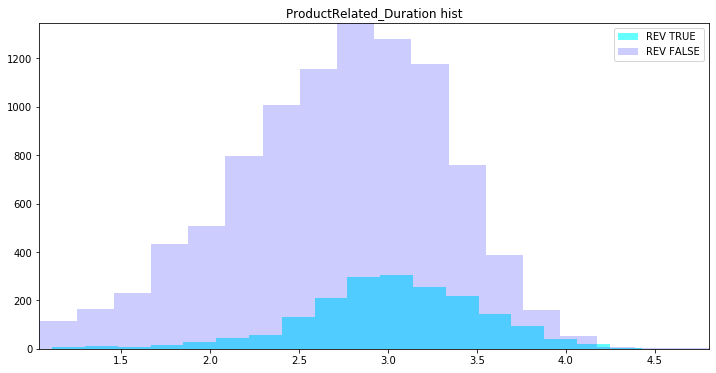

In [260]:
plt.figure(figsize=(12,6))
df1['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.6, color='cyan', label='REV TRUE')
df2['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.2, color='blue', label='REV FALSE')
plt.grid()
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('ProductRelated_Duration hist')
plt.plot()

## ML PREDICTIONS

In [261]:
#df = df[df['Administrative_Duration'] > 0]
df1 = df[df['ProductRelated_Duration'] > 0]
# df = df[df['Informational_Duration'] > 0]
print(len(df))
df['REV_B'] = df['Revenue'].apply(lambda x: 1 if x==True else 0)
df['WEEK_B'] = df['Weekend'].apply(lambda x: 1 if x==True else 0)
df.head()

12316


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,REV_B,WEEK_B
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,1


In [262]:
month_Num = {"May":5, "Nov": 11, "Mar":3, "Dec":12, "Oct":10, "Sep":9, "Aug":8, "Jul":7,
                     "June":6, "Feb":2} 

In [263]:
df['Month_1'] = df['Month'].map(month_Num)
df['Month_1'].value_counts()

5     3363
11    2998
3     1894
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month_1, dtype: int64

In [264]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,REV_B,WEEK_B,Month_1
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477,0.154920,0.232624,7.657113
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598,0.361844,0.422522,3.391314
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,5.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,7.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,11.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,12.000000


In [265]:
attr = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month_1', 'OperatingSystems', 'Browser', 'WEEK_B']

for col in attr:
    print(df[col].head(2))

0    0.0
1    0.0
Name: Administrative, dtype: float64
0    0.0
1    0.0
Name: Administrative_Duration, dtype: float64
0    0.0
1    0.0
Name: Informational, dtype: float64
0    0.0
1    0.0
Name: Informational_Duration, dtype: float64
0    1.0
1    2.0
Name: ProductRelated, dtype: float64
0     0.0
1    64.0
Name: ProductRelated_Duration, dtype: float64
0    0.2
1    0.0
Name: BounceRates, dtype: float64
0    0.2
1    0.1
Name: ExitRates, dtype: float64
0    0.0
1    0.0
Name: PageValues, dtype: float64
0    0.0
1    0.0
Name: SpecialDay, dtype: float64
0    2
1    2
Name: Month_1, dtype: int64
0    1
1    2
Name: OperatingSystems, dtype: int64
0    1
1    2
Name: Browser, dtype: int64
0    0
1    0
Name: WEEK_B, dtype: int64


#### Logistic Regression

In [266]:
x_tr, x_t, y_tr, y_t = train_test_split( df[attr].values, (df['REV_B']).values, test_size=0.3)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,LogisticRegression,0.88525,0.514874,0.762712,0.388601,0.683068


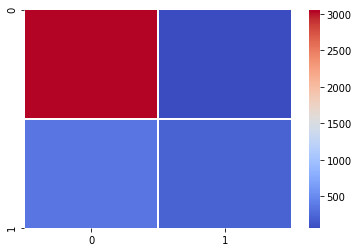

In [267]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['LogisticRegression', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['LogisticRegression', accu, f1, prece, recal, roc]], columns= matric_n )

#### DecisionTreeClassifier

In [268]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
print( ' Accuracy score : ', accuracy_score(y_t, y_p), ', ROC score', roc_auc_score(y_t, y_p))

 Accuracy score :  0.8798376184032476 , ROC score 0.6757820547573868


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,DecisionTreeClassifier,0.879838,0.501124,0.755932,0.37479,0.675782


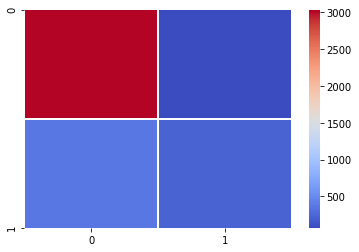

In [269]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['DecisionTreeClassifier', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['DecisionTreeClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

#### ExtraTreesClassifier

In [270]:
test_sizee = np.arange(0.1, 0.4, 0.01)
depth = np.arange(2,12,1)
scores_roc = []
scores_prec = []

for t_size in test_sizee:
    x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values, (df['REV_B']).values, test_size=t_size)
    for d in depth:
        clf = ExtraTreesClassifier(max_depth=d)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        scores_roc.append(roc_auc_score(y_t, y_p))
        scores_prec.append(precision_score(y_t, y_p))

maxx_roc = 0
maxx_idx = 0
for idx1 in range(len(scores_roc)):
    if scores_roc[idx1]>maxx_roc:
        maxx_roc = scores_roc[idx1]
        maxx_idx = idx1
        
print('THE BEST ROC SCORE :', maxx_roc)


maxx_prec = 0
maxx_idx = 0
for idx2 in range(len(scores_prec)):
    if scores_prec[idx2]>maxx_prec:
        maxx_prec = scores_roc[idx2]
        maxx_idx = idx2
        
print('THE BEST ROC SCORE :', maxx_prec)


THE BEST ROC SCORE : 0.6504908489767777
THE BEST ROC SCORE : 0.6389375149628921


In [271]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_p = clf_extree.predict(x_t)

In [272]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ExtraTreesClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ExtraTreesClassifier,0.885326,0.528774,0.706013,0.422667,0.695533


#### RandomForestClassifier

In [273]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [274]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['RandomForestClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,RandomForestClassifier,0.895068,0.592593,0.72447,0.501333,0.733549


In [275]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['RandomForestClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,RandomForestClassifier,0.99012,0.967541,0.99725,0.939551,0.969535


### ensemble.GradientBoostingClassifier 

In [276]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [277]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ensemble.GradientBoostingClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ensemble.GradientBoostingClassifier,0.903592,0.657534,0.715856,0.608,0.782334


In [278]:
y_tr_p = clf.predict(x_tr)
accu = accuracy_score(y_tr, y_tr_p)
f1 = f1_score(y_tr, y_tr_p)
prece = precision_score(y_tr, y_tr_p)
recal = recall_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)

matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']
pd.DataFrame( [['ensemble.GradientBoostingClassifier', accu, f1, prece, recal, roc]], columns= matric_n )

,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ensemble.GradientBoostingClassifier,0.919881,0.721805,0.791753,0.663212,0.815397


#### GRID SEARCH

In [279]:
test_sizee = np.arange(0.20, 0.45, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values, (df['REV_B']).values, test_size=t_size)
        lr = ensemble.GradientBoostingClassifier()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))

In [280]:
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

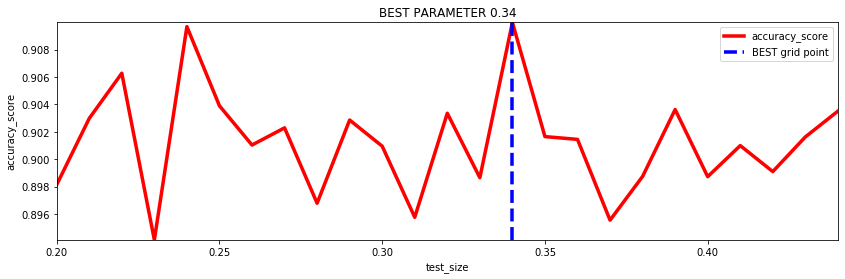

In [281]:
plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()

### RECEIVER OPERATING CHARACTERSTIC (ROC), CROSS VALIDATION


ROC curve is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is verified.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [282]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

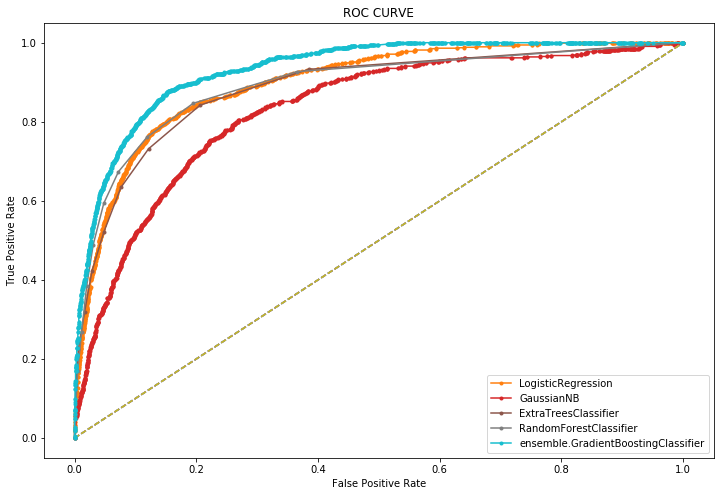

In [283]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 

MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier', 'RandomForestClassifier', 'ensemble.GradientBoostingClassifier']

roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [288]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier : ensemble.GradientBoostingClassifier', '\n', 'with roc_auc_score : ', best_roc)
MLclf[best_roc_idx]

The best classifier : ensemble.GradientBoostingClassifier 
 with roc_auc_score :  0.7804911167276684


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### GRID SEARCH RandomForestClassifier

In [285]:
def grid_search():
    depth_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10] #  11, 12, 13, 14, 15
    roc_score = []
    for d in depth_grid:
        clf = ensemble.GradientBoostingClassifier(max_depth=d)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        score = roc_auc_score(y_t, y_p)
        roc_score.append(score)
    return depth_grid,roc_score

In [286]:
score = grid_search()
print(score[0],'\n \n', score[1])

[2, 3, 4, 5, 6, 7, 8, 9, 10] 
 
 [0.7783875827038909, 0.7749356163696065, 0.7693801160115445, 0.7753293443378453, 0.7760197376047022, 0.7718576342846748, 0.769948225600139, 0.7658184765033186, 0.76633448814982]


,ML Model,accuracy_,f1_,precision_,recall,ROC
0,ensemble.GradientBoostingClassifier,0.903321,0.663671,0.74175,0.600465,0.780491


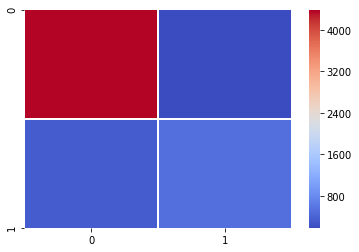

In [287]:
accu = accuracy_score(y_t, y_p)
f1 = f1_score(y_t, y_p)
prece = precision_score(y_t, y_p)
recal = recall_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)

matric_v = ['ensemble.GradientBoostingClassifier', accu, f1, prece, recal, roc]
matric_n = ['ML Model', 'accuracy_', 'f1_', 'precision_', 'recall', 'ROC']

cmatrix = confusion_matrix(y_t, y_p)
sns.heatmap(cmatrix, cbar=True, square=False, linewidth=1.0, cmap='coolwarm')

pd.DataFrame( [['ensemble.GradientBoostingClassifier', accu, f1, prece, recal, roc]], columns= matric_n )